## 📚 SakamKnigi.mk - Book Dataset Cleaning & Preprocessing

In [176]:
import pandas as pd
import missingno as msno
import re
import numpy as np

In [177]:
df= pd.read_csv('../data/original_datasets/sakamknigi_books.csv', encoding='utf-8-sig') 

In [178]:
df = df.drop('id', axis=1)

In [179]:
df.head()

,title,author,real_price,sale_price,sale,category,retrieved_at
0,Фаворити,од: Лејн Фарго,590 ден,590 ден,0,Романси,2025-05-02
1,Тунел,од: Ана Волц,400 ден,400 ден,0,Романси,2025-05-02
2,Љубов во Рим,од: Сара Адамс,490 ден,490 ден,0,Романси,2025-05-02
3,Шпанска љубовна измама,од: Елена Армас,590 ден,590 ден,0,Романси,2025-05-02
4,Изопачени лаги,од: Ана Хуанг,590 ден,590 ден,0,Романси,2025-05-02


In [180]:
df['sale'].value_counts()

sale
0    2154
1      15
Name: count, dtype: int64

### 1. Converting the 'Sale' Column to Boolean & rename it


In [181]:
df["sale"] = df["sale"].astype(bool)

In [182]:
df = df.rename(columns={"sale": "IsOnSale"})

### 2. Convert the 'Retrieved At' column to datetime format.

In [183]:
df['retrieved_at'] = pd.to_datetime(df['retrieved_at'])

### 3. Remove "од" from the 'Author' column


In [184]:
df['author'] = df['author'].str.replace("од:", "")

In [185]:
df.to_csv("../data/preprocessed_datasets/sakamknigi_books.csv", encoding='utf-8-sig', index=False)
df= pd.read_csv('../data/preprocessed_datasets/sakamknigi_books.csv', encoding='utf-8-sig') 

In [186]:
df.head()

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at
0,Фаворити,Лејн Фарго,590 ден,590 ден,False,Романси,2025-05-02
1,Тунел,Ана Волц,400 ден,400 ден,False,Романси,2025-05-02
2,Љубов во Рим,Сара Адамс,490 ден,490 ден,False,Романси,2025-05-02
3,Шпанска љубовна измама,Елена Армас,590 ден,590 ден,False,Романси,2025-05-02
4,Изопачени лаги,Ана Хуанг,590 ден,590 ден,False,Романси,2025-05-02


In [187]:
df.isnull().sum()

title              0
author          1617
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
dtype: int64

### 4. Prices
- Before converting to numeric,remove "ден", remove commas and strip whitespace


In [188]:
df['real_price'] = df['real_price'].str.replace("ден", "", regex=False).str.replace(",", "").str.strip()
df['sale_price'] = df['sale_price'].str.replace("ден", "", regex=False).str.replace(",", "").str.strip()

df["real_price"] = pd.to_numeric(df["real_price"], errors="coerce")
df["sale_price"] = pd.to_numeric(df["sale_price"], errors="coerce")

In [189]:
df.isnull().sum()

title              0
author          1617
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
dtype: int64

- If a book is not on sale (IsOnSale == False), its Sale Price should be 0 — unless there's a mismatch with Real Price that we want to preserve.

In [190]:
exclude_indices = df[(df['IsOnSale'] == False) & (df['sale_price'] != df['real_price'])].index
df.loc[(df['IsOnSale'] == False) & (~df.index.isin(exclude_indices)), 'sale_price'] = 0


In [191]:
df.isnull().sum()

title              0
author          1617
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
dtype: int64

In [192]:
df.IsOnSale.value_counts()

IsOnSale
False    2154
True       15
Name: count, dtype: int64

In [193]:
df.head()

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at
0,Фаворити,Лејн Фарго,590.0,0.0,False,Романси,2025-05-02
1,Тунел,Ана Волц,400.0,0.0,False,Романси,2025-05-02
2,Љубов во Рим,Сара Адамс,490.0,0.0,False,Романси,2025-05-02
3,Шпанска љубовна измама,Елена Армас,590.0,0.0,False,Романси,2025-05-02
4,Изопачени лаги,Ана Хуанг,590.0,0.0,False,Романси,2025-05-02


In [194]:
df[df['IsOnSale']==True]

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at
21,Венчани до изгрејсонце (Хатавеј #4),Лиса Клејпас,470.0,349.0,True,Романси,2025-05-02
82,Умри за мене,Синтија Идн,450.0,225.0,True,Романси,2025-05-02
344,Умри за мене,Синтија Идн,450.0,225.0,True,Мистерии,2025-05-02
468,Венчани до изгрејсонце (Хатавеј #4),Лиса Клејпас,470.0,349.0,True,Историски,2025-05-02
477,Сагата за Рајна,Оља Петрушевска – Томева,350.0,249.0,True,Историски,2025-05-02
704,Чудо,Р.Џ Паласио,390.0,195.0,True,За млади,2025-05-02
1048,ИЗЛЕЗ,Саша Богдан,350.0,249.0,True,Трилери,2025-05-02
1103,Шепкачот,NaN,450.0,225.0,True,Трилери,2025-05-02
1186,Силвервју,NaN,360.0,280.0,True,Трилери,2025-05-02
1408,Сагата за Рајна,Оља Петрушевска – Томева,350.0,249.0,True,Драми,2025-05-02


In [195]:
missing_prices_df = df[df['real_price'].isna() | df['sale_price'].isna()]
missing_prices_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at
1155,Азбучната куќа,NaN,NaN,NaN,False,Трилери,2025-05-02
1868,Коалата што не можеше да заспие,NaN,NaN,NaN,False,Детски книги,2025-05-03


### Create Discount Percentage Column(%):
- If IsOnSale is True, calculate discount info(discount percentage)

In [196]:
df['Discount (%)'] = 0.0

mask = (df['IsOnSale'] == True) & (df['real_price'] > 0)
df.loc[mask, 'Discount (%)'] = (
    ((df.loc[mask, 'real_price'] - df.loc[mask, 'sale_price']) / df.loc[mask, 'real_price']) * 100
).round().astype(int)


In [197]:
df.head()

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
0,Фаворити,Лејн Фарго,590.0,0.0,False,Романси,2025-05-02,0.0
1,Тунел,Ана Волц,400.0,0.0,False,Романси,2025-05-02,0.0
2,Љубов во Рим,Сара Адамс,490.0,0.0,False,Романси,2025-05-02,0.0
3,Шпанска љубовна измама,Елена Армас,590.0,0.0,False,Романси,2025-05-02,0.0
4,Изопачени лаги,Ана Хуанг,590.0,0.0,False,Романси,2025-05-02,0.0


In [198]:
missing_prices_df = df[df['real_price'].isna() | df['sale_price'].isna()]
missing_prices_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
1155,Азбучната куќа,NaN,NaN,NaN,False,Трилери,2025-05-02,0.0
1868,Коалата што не можеше да заспие,NaN,NaN,NaN,False,Детски книги,2025-05-03,0.0


In [199]:
df.isnull().sum()

title              0
author          1617
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
Discount (%)       0
dtype: int64

### Duplicates
- 10 entries are completely identical. We can merge them, Keep only one

In [200]:
duplicates = df[df.duplicated(keep=False)]
duplicates = duplicates.sort_values(by=['title', 'author'])
print("Length of duplicates: ", len(duplicates))
duplicates.head(10)

Length of duplicates:  10


,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
1016,Голем готвач за бебиња и мали децa,NaN,1990.0,0.0,False,Здравје и исхрана,2025-05-02,0.0
1018,Голем готвач за бебиња и мали децa,NaN,1990.0,0.0,False,Здравје и исхрана,2025-05-02,0.0
2057,Кифличката Мирна,NaN,250.0,0.0,False,Детски книги,2025-05-03,0.0
2146,Кифличката Мирна,NaN,250.0,0.0,False,Детски книги,2025-05-03,0.0
2038,Мојот брат од тринаесеттиот кат,NaN,250.0,0.0,False,Детски книги,2025-05-03,0.0
2145,Мојот брат од тринаесеттиот кат,NaN,250.0,0.0,False,Детски книги,2025-05-03,0.0
5,Убавината на скршените нешта,Ивана Спасев,390.0,0.0,False,Романси,2025-05-02,0.0
6,Убавината на скршените нешта,Ивана Спасев,390.0,0.0,False,Романси,2025-05-02,0.0
1380,Убавината на скршените нешта,Ивана Спасев,390.0,0.0,False,Драми,2025-05-02,0.0
1381,Убавината на скршените нешта,Ивана Спасев,390.0,0.0,False,Драми,2025-05-02,0.0


In [201]:
print("Original:", len(df))
df = df.drop_duplicates()
print("After drop_duplicates:", len(df))
print("Duplicates removed:", len(df) - len(df))

Original: 2169
After drop_duplicates: 2164
Duplicates removed: 0


### Author

- All 6 Harry Poter books have a missing value in the Author field. Replace all with  'Џ.К. Роулинг'

In [202]:
harry_potter_rows = df[df['title'].str.contains('Хари Потер', case=False, na=False)]
harry_potter_rows

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
451,Хари Потер и Каменот на мудроста (прв дел),NaN,650.0,0.0,False,Мистерии,2025-05-02,0.0
452,Хари Потер и и затвореникот од Азкабан,NaN,700.0,0.0,False,Мистерии,2025-05-02,0.0
453,Хари Потер и Одајата на тајните,NaN,650.0,0.0,False,Мистерии,2025-05-02,0.0
723,Хари Потер и Редот на фениксот,NaN,1150.0,0.0,False,За млади,2025-05-02,0.0
1185,Хари Потер и Редот на фениксот,NaN,1150.0,0.0,False,Трилери,2025-05-02,0.0
1587,Хари Потер и Редот на фениксот,NaN,1150.0,0.0,False,Драми,2025-05-02,0.0


In [203]:
df.loc[df['title'].str.contains('Хари Потер', case=False, na=False), 'author'] = 'Џ.К. Роулинг'

In [204]:
df.isnull().sum()

title              0
author          1608
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
Discount (%)       0
dtype: int64

- Extract authors from the titles that contain authors(e.g. "Избрани песни – Ана Ахматова")

In [205]:
# See which authord have – or  - or —
authors_fix = df[df['title'].str.contains(r'\s[–\-—]\s\w+(?:\s\w+)?', regex=True, case=False)]
authors_fix.head(100)

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
383,Црниот мачор – раскази за мистеријата,NaN,300.0,0.0,False,Мистерии,2025-05-02,0.0
522,Избрани песни – Ана Ахматова,NaN,350.0,0.0,False,Историски,2025-05-02,0.0
544,Атлас – Приказната на Тате Солт,NaN,940.0,0.0,False,Историски,2025-05-02,0.0
604,Снеговите на љубовта – книга втора,NaN,199.0,0.0,False,Историски,2025-05-02,0.0
605,Снеговите на љубовта – книга прва,NaN,199.0,0.0,False,Историски,2025-05-02,0.0
771,Подарокот – Едит Егер,NaN,400.0,0.0,False,Психологија,2025-05-02,0.0
810,Мудар родител – среќен тинејџер,NaN,600.0,0.0,False,Психологија,2025-05-02,0.0
840,Мудар родител – време е за градинка,NaN,650.0,0.0,False,Психологија,2025-05-02,0.0
870,Умешноста да ја креирате вашата реалност – Вод...,NaN,450.0,0.0,False,Психологија,2025-05-02,0.0
892,МУДАР РОДИТЕЛ – СРЕЌНО БЕБЕ,NaN,600.0,0.0,False,Психологија,2025-05-02,0.0


In [206]:
updates = {
   522: {'title': 'Избрани песни', 'author': 'Ана Ахматова'},
   769: {'title': 'Подарокот', 'author': 'Едит Егер'},
   842: {'title': 'Херој', 'author': 'Р.Бирн'},
   975: {'title': 'ИСТОРИЈА НА РЕЛИГИИТЕ', 'author': 'Александар Мењ'}
}

for idx, update in updates.items():
    df.at[idx, 'title'] = update['title']
    df.at[idx, 'author'] = update['author']

- Check for 'и'

In [207]:
two_authors_df = df[df['author'].str.contains(r'\sи\s', case=False, na=False)]
two_authors_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
355,Совршената замена,Грир Хендрикс и Сара Пеканен,440.0,0.0,False,Мистерии,2025-05-02,0.0
1113,Совршената замена,Грир Хендрикс и Сара Пеканен,440.0,0.0,False,Трилери,2025-05-02,0.0
1783,Да можев да ти го подарам Божиќ,Џенифер Л. Мајер и Лин Плорд,320.0,249.0,True,Детски книги,2025-05-03,22.0


In [208]:
two_authors_df = df[df['author'].str.contains(r'\sи\s', case=False, na=False)].copy()

two_authors_df['author'] = two_authors_df['author'].str.split(' и ')

exploded_df = two_authors_df.explode('author', ignore_index=True)

df = pd.concat([df[~df['author'].str.contains(r'\sи\s', case=False, na=False)], exploded_df], ignore_index=True)

In [209]:
two_authors_df = df[df['author'].str.contains(r'\sи\s', case=False, na=False)]
two_authors_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)


- Check for Authors divided by , Example: 1060	Аурис	 Себастијан Фицек, Винсент Клиш,

In [210]:
# Find rows with commas in Author
comma_rows = df['author'].str.contains(r'\s*,\s*', na=False)

# Remove trailing commas in those rows
df.loc[comma_rows, 'author'] = df.loc[comma_rows, 'author'].str.rstrip(', ')


In [211]:
comma_authors_df = df[df['author'].str.contains(r'\s*,\s*', na=False)]
comma_authors_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)
29,Кралицата Шарлота,"Џулија Квин, Шонда Рајмс",520.0,0.0,False,Романси,2025-05-02,0.0
470,Кралицата Шарлота,"Џулија Квин, Шонда Рајмс",520.0,0.0,False,Историски,2025-05-02,0.0
1060,Аурис,"Себастијан Фицек, Винсент Клиш",450.0,0.0,False,Трилери,2025-05-02,0.0
1384,Кралицата Шарлота,"Џулија Квин, Шонда Рајмс",520.0,0.0,False,Драми,2025-05-02,0.0
1416,Аурис,"Себастијан Фицек, Винсент Клиш",450.0,0.0,False,Драми,2025-05-02,0.0


In [212]:
comma_authors_df = df[df['author'].str.contains(r'\s*,\s*', na=False)].copy()

comma_authors_df['author'] = comma_authors_df['author'].str.rstrip(', ')
comma_authors_df['author'] = comma_authors_df['author'].str.split(r'\s*,\s*')
exploded_comma_df = comma_authors_df.explode('author', ignore_index=True)
df = df[~df['author'].str.contains(r'\s*,\s*', na=False)]
df = pd.concat([df, exploded_comma_df], ignore_index=True)


In [213]:
comma_authors_df = df[df['author'].str.contains(r'\s*,\s*', na=False)]
comma_authors_df

,title,author,real_price,sale_price,IsOnSale,category,retrieved_at,Discount (%)


In [214]:
df.isnull().sum()

title              0
author          1605
real_price         2
sale_price         2
IsOnSale           0
category           0
retrieved_at       0
Discount (%)       0
dtype: int64

### Missing values

- The heatmap shows that the two columns have missing values in exactly the same rows.
- If Real Price is NaN → Sale Price is also NaN.
- If Sale Price is NaN → Real Price is also NaN.

<Axes: >

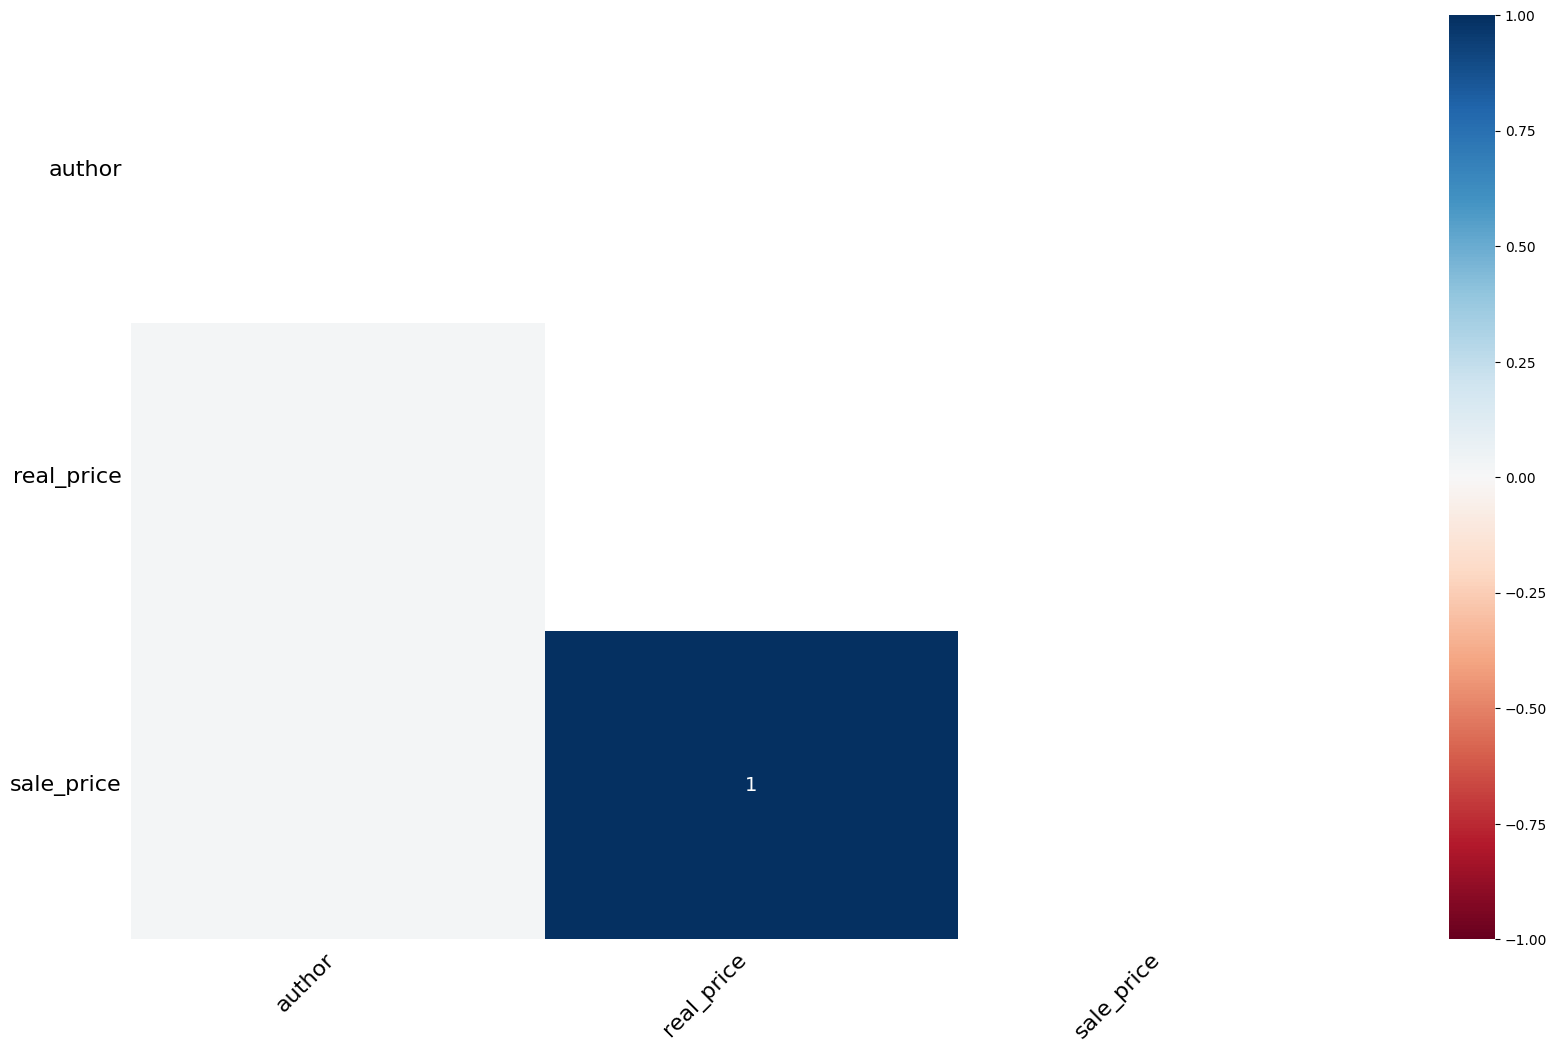

In [215]:
msno.heatmap(df)

In [216]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.round(2)
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,title,0.00
1,author,73.90
2,real_price,0.09
3,sale_price,0.09
4,IsOnSale,0.00
5,category,0.00
6,retrieved_at,0.00
7,Discount (%),0.00


In [217]:
total_rows = len(df)
missing_authors = df['author'].isna().sum()
non_missing_authors = total_rows - missing_authors

print(f"\n'Author' column:")
print(f"Non-missing values: {non_missing_authors}")
print(f"Missing values: {missing_authors}")
print(f"Percentage missing: {round((missing_authors / total_rows) * 100, 2)}%")



'Author' column:
Non-missing values: 567
Missing values: 1605
Percentage missing: 73.9%


In [218]:
df.to_csv("../data/preprocessed_datasets/sakamknigi_books.csv", encoding='utf-8-sig', index=False)

### Preprocessing Output Summary

Number of Books Scraped

In [219]:
df.shape[0]

2172

Number of categories

In [220]:
total_categories = df['category'].nunique()
print(total_categories)

11


Number of Discounted Books


In [221]:
num_distinct_on_sale = df[df['IsOnSale'] == True]['title'].nunique()
print(num_distinct_on_sale)

11
